In [1]:
import tensorflow as tf

from sklearn.datasets import load_sample_images
from matplotlib import pyplot as plt


model = tf.keras.applications.ResNet50(weights="imagenet")

In [2]:
images = load_sample_images()["images"]
images_resized = tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True)(images)
inputs = tf.keras.applications.resnet50.preprocess_input(images_resized)

Y_proba = model.predict(inputs)
Y_proba.shape

1/1 [==============================] - 1s 729ms/step


(2, 1000)

In [3]:
top_K = tf.keras.applications.resnet50.decode_predictions(Y_proba, top=3)

for image_index in range(len(images)):
    print(f"Image #{image_index}")
    for class_id, name, y_proba in top_K[image_index]:
        print(f" {class_id} - {name:12s} {y_proba:.2%}")

Image #0
 n03877845 - palace       54.69%
 n03781244 - monastery    24.72%
 n02825657 - bell_cote    18.55%
Image #1
 n04522168 - vase         32.66%
 n11939491 - daisy        17.81%
 n03530642 - honeycomb    12.06%


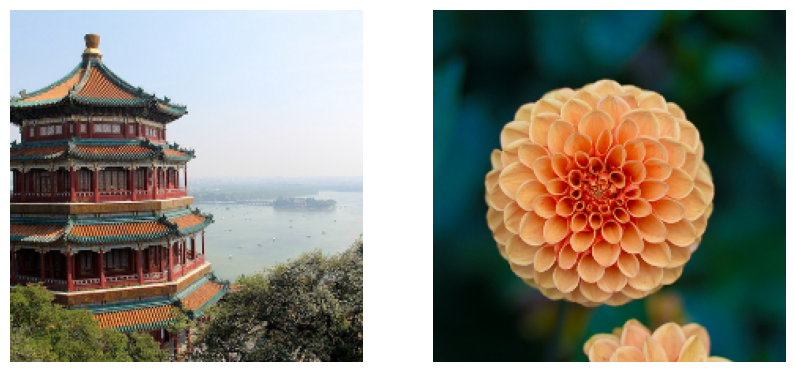

In [4]:
# extra code – displays the cropped and resized images

plt.figure(figsize=(10, 6))
for idx in (0, 1):
    plt.subplot(1, 2, idx + 1)
    plt.imshow(images_resized[idx] / 255)
    plt.axis("off")

plt.show()

[返回](readme.md)